# Akaike criterion para modelos AR(p,q)

```
i=0;
i=i+1;
PRINT i;
IF i=100 THEN GOTO 6;
GOTO 2;
PRINT "Program completed"
END

$$X_t = Z_t + \phi_1 X_{t-1} + \phi_2 X_{t-2} + 
\cdots + \beta_1 Z_{t-1} + \cdots \beta_q Z_{t-q} $$

Tenemos una distribucion multivariada
$Z=[Z_1, Z_2, \cdots , Z_n] $, $n=q$. 

La matriz de covarianza

$$ \Sigma_{ij} = \text{cov}[ Z_k, Z_j] = \mathbb{E} [ (Z_i)^T (Z_j)]  $$

Recordemos la distribucion normal multivariada PDF:

$$ p(x, \mu, \Sigma) = \mathcal{N}(\mu, \Sigma) = \mathcal{L}(\theta | X) = \frac{1}{\sqrt{ ( 2 \pi )^n  \det ( \Sigma) }} \exp \left ( -\frac12 Z^T \Sigma^{-1} Z \right ) \quad (1) $$


El paraetro $\theta$ tiene los elementos 

$$\theta = (\phi_1, \phi_2, \cdots, \phi_p, \beta_1, \beta_2, \beta_q)  $$.

En resumen para calcular el AIC en un ARMA(p,q)

* Evaluar $K=p+q+2$.
* Evaluar el likelihood ( Ecuacion (1)) como una productoria, asumiento independencia estadistica de los distintos eventos.
* Hallar el logaritmo negativo de la ecuacion de la expresion anterior.  A este lo llamaremos $J(\theta)$. Esta es la funcion de costo.
* Hallar el gradiente de la funcion de costo $J(\theta)$.
* Resolvemos el sistema de $n=p+q+2$ ecuaciones con $n$ incognitas $\nabla_{\theta} J(\theta) = 0$. Llamemos $\theta_0$ la solucion del sistema
anterior. 

* Con esta informacion se evalua el AIC:

$$\text{AIC} = 2K - 2 \ln (L) = 2K + 2 J(\theta_0)$$

# Ljung-Box Q-statistics

El Ljung-BOx generaliza una prueba mas simple llamada el Box-pierce test.

El "Q" en el Box-pierce test se define:

$$Q = n \sum_{k=1}^m \hat{\rho_k}^2  $$

Como se usa este $Q$. Existe en la estadistica un pruebas (tests) para mostrar la evidencia experimental de un hecho. Se usa lo que llaman el null hypthesis $H0$ versus $H1$ altenative.

* La hipotesis nula H0: La serie es ruido blanco (white noise)
* La hipotesis alternativa H1: La serie muestra correlaciones. No es random.

Para las hipotesis se necesitan dos cosas:

* La distribucion que se usa
* El umbral ($\alpha=0.05$). A partir de este se dice que se rechaza la hipoteis nula. 

La distribucion que se usa para este caso es la Chi-cuadrado ($\chi$-squared).

## Distribucion Gamma:
$$ p_(k , \theta) (x) = \frac{1}{\Gamma(k) \theta^k} x^{k-1} \mathrm{e}^{-x/\theta} $$




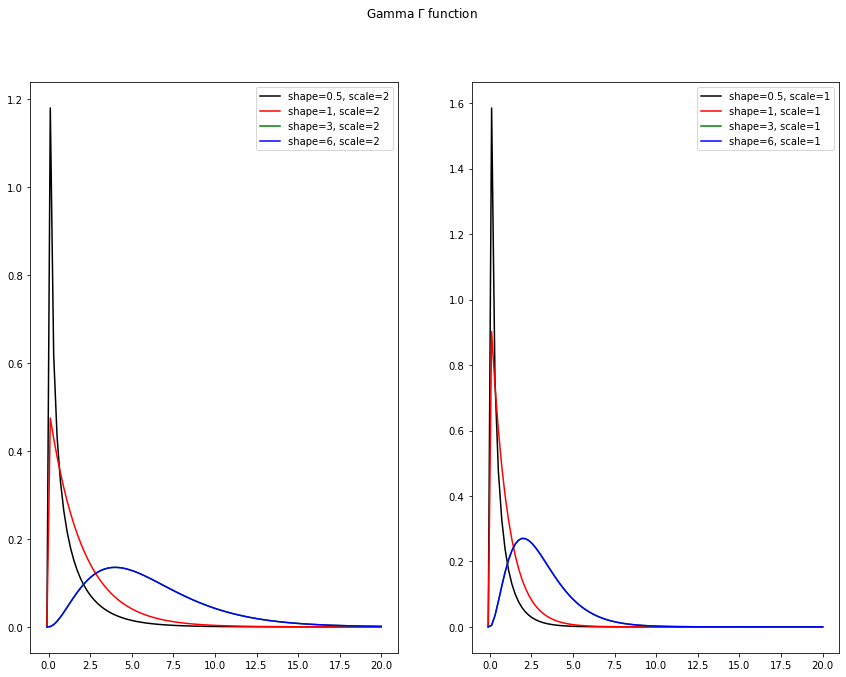

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)
fig.suptitle('Gamma $\Gamma$ function')
fig.set_size_inches(14.5, 10.5)

# dominio
x=np.linspace(-0.1, 20, 100)
y1 = stats.gamma.pdf(x, a=0.5, scale=2)
y2 = stats.gamma.pdf(x, a=1, scale=2)
y3 = stats.gamma.pdf(x, a=3, scale=2)
y4 = stats.gamma.pdf(x, a=6, scale=2)

axs[0].plot(x, y1, label='shape=0.5, scale=2', color='k')
axs[0].plot(x, y2, label='shape=1, scale=2', color='r')
axs[0].plot(x, y3, label='shape=3, scale=2', color='g')
axs[0].plot(x, y3, label='shape=6, scale=2', color='b')

axs[0].legend(loc='upper right')

y1 = stats.gamma.pdf(x, a=0.5, scale=1)
y2 = stats.gamma.pdf(x, a=1, scale=1)
y3 = stats.gamma.pdf(x, a=3, scale=1)
y4 = stats.gamma.pdf(x, a=6, scale=1)

axs[1].plot(x, y1, label='shape=0.5, scale=1', color='k')
axs[1].plot(x, y2, label='shape=1, scale=1', color='r')
axs[1].plot(x, y3, label='shape=3, scale=1', color='g')
axs[1].plot(x, y3, label='shape=6, scale=1', color='b')

axs[1].legend(loc='upper right')


plt.show();



## Chi-squared:

$$ p_{k/2, \theta=2} = \chi_k^2(x) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2-1} \mathrm{e}^{-x/2} $$

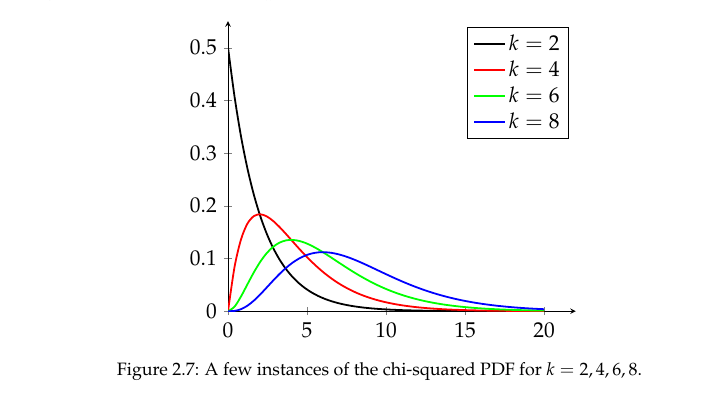

$Q$ pare el L-jung-Box

$$ \text{Q} = n(n+2) \sum_{k=1}^m  \frac{\hat{\rho_k}^2}{n-k} $$

$n$ es el numero de muestras
$m$ el orden (numero de lags) $\hat{\rho}_k$ son coeficientes del ACF.


### $\chi^2$ test para precencia de autocorrelaciones.
queremos saber si los datos son ruido blanco o tienen informacion (auto-correlaciones) en ellos.


$$\int_a^b f(x) dx$$



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


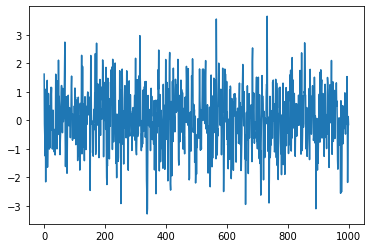

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)
mu, sigma=0,1
N=1000

Z = np.random.normal(mu, sigma, N)

phi=0.3
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]


plt.plot(X)




Sabemos que  $\rho_{\tau} = \phi^{\tau}$. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

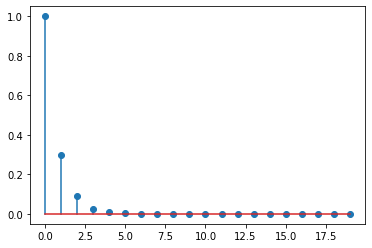

In [ ]:
# Calculamos la autocorrelacion
M=20 # (lags)
rho = np.zeros(M)
rho = [phi**i for i in range(M)]
plt.stem(rho)

In [ ]:
# calculamos Q, para el Box-Pierce
from scipy.stats import chi2

# degrees of freedom
dof = M-1  # M-p-q
Q = N * sum( (rho[j])**2 for j in range(1, M))

# significantes
# definamos la probabilidad para aceptar el exito. No rechazar la hipotesis nula
prob=0.95

# hallamos el p-value (area bajo la curva correspondiente al 5% al final) de la chi-square
p = 1 - chi2.cdf(x=Q, df=dof)

alpha=0.05

if p<alpha :
    print("no paso la prueba de hipotesis nula p=%f, alpha=%f"%(p, alpha))
    print("hay correlaciones presentes, no es ruido blanco")
else:
    print("paso la prueba de hiopotesi nula p=%f, alpha=%f"%(p,alpha))
    print("no hay correlaciones significantes entre lags")


no paso la prueba de hipotesis nula p=0.000000, alpha=0.050000
hay correlaciones presentes, no es ruido blanco


In [ ]:
# usamemos statsmodels
sm.stats.acorr_ljungbox(X, lags=[M],  boxpierce=True)

(array([102.9888728]),
 array([3.66194426e-13]),
 array([102.47497062]),
 array([4.53094709e-13]))

In [ ]:
# Ljung-box test
dof = M-1
Q = N*(N+2)* sum( rho[j]**2/(N-j) for j in range(1, M))

print("Q", Q)

prob=0.95 # la pongo pero la uso
critical  = chi2.ppf(prob, dof)

# encuentre el p-value
p = 1 - chi2.cdf(x=Q, df=dof)
print(p)

alpha = 0.05 


if p<alpha :
    print("no paso la prueba de hipotesis nula p=%f, al#"%(p, alpha))
    print("hay correlaciones presentes, no es ruido blanco")
else:
    print("paso la prueba de hiopotesi nula p=%f, alpha=%f"%(p,alpha))
    print("no hay correlaciones significantes entre lags")


Q 99.2079316109619
7.4495964952348e-13
no paso la prueba de hipotesis nula p=0.000000, alpha=0.050000
hay correlaciones presentes, no es ruido blanco


In [ ]:
# Ljung-box test
sm.stats.acorr_ljungbox(X, lags=[M])

(array([102.9888728]), array([3.66194426e-13]))

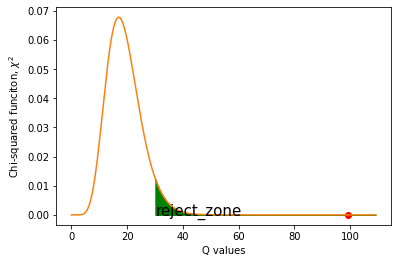

Q= 99.2079316109619


In [ ]:
# grafiquemos para entender mejor que pasa
from scipy.stats import chi2
import scipy.stats 

# encuentre el valor critico del chi-squared
critical_value = chi2.ppf(1-0.05, df=dof)

tail = Q + 10
a = np.arange(0, tail, 0.001)

def mychi2(x, M):
    return chi2.pdf(x, df=M)

plt.fill_between(a, mychi2(a,dof), 0,
                 where = (a > critical_value),
                 color='g');

yval=mychi2(Q, dof)
plt.xlabel("Q values")
plt.ylabel("Chi-squared funciton, $\chi^2$")

plt.plot(Q, 0, marker='o', markersize=6, markeredgecolor='r', markerfacecolor='r')

plt.text(critical_value, 0, 'reject_zone', fontsize=15)

plt.plot(a, mychi2(a,dof));
plt.show()
print("Q=", Q)






## Removemos ahora las correlaciones en los datos y probamos de nuevo la hipotessis nula.

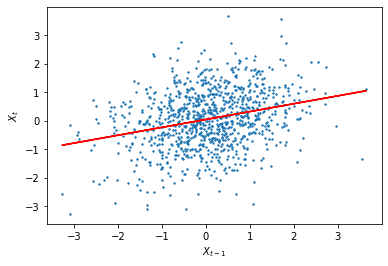

In [ ]:
Xtm1 = X[1:] # se transladan los datos una muestra a la derecha (shift)
Xt = X[:-1]  # se trunca la ultima muetrra.

slope, intercept = np.polyfit(Xtm1, Xt, 1)
estimate = intercept + slope*Xtm1

plt.scatter(Xtm1, Xt, s=2)
plt.plot(Xtm1, estimate, c='r')
plt.xlabel('$X_{t-1}$')
plt.ylabel('$X_t$')
plt.show()

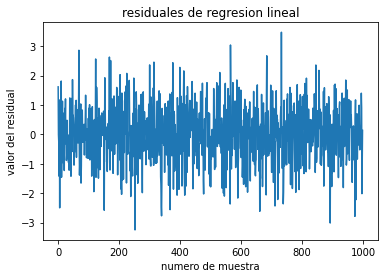

In [ ]:
# enconremos los residuos (residuals)
n = len (Xt)
res = np.zeros(n)
for i in range(n):
    res[i] = Xt[i] - intercept - slope*Xtm1[i]

plt.title("residuales de regresion lineal")
plt.xlabel("numero de muestra")
plt.ylabel("valor del residual")
plt.plot(res)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


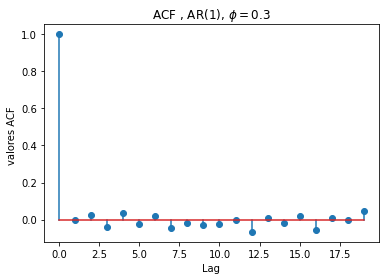

In [ ]:
M=20
import statsmodels.api as sm
rho2 = sm.tsa.acf(res)[0:M]
plt.title("ACF , AR(1), $\phi=0.3$")
plt.xlabel("Lag")
plt.ylabel("valores ACF ")
plt.stem(rho2)
plt.show()

In [ ]:
# calculamos Q el p-value del Box PIercfe
from scipy.stats import chi2

# degrees of freedom
dof = M-1  # M-p-q
Q = N * sum( (rho2[j])**2 for j in range(1, M))

# significantes
# definamos la probabilidad para aceptar el exito. No rechazar la hipotesis nula
prob=0.95

# hallamos el p-value (area bajo la curva correspondiente al 5% al final) de la chi-square
p = 1 - chi2.cdf(x=Q, df=dof)

alpha=0.05

if p<alpha :
    print("no paso la prueba de hipotesis nula p=%f, alpha=%f"%(p, alpha))
    print("hay correlaciones presentes, no es ruido blanco")
else:
    print("paso la prueba de hiopotesi nula p=%f, alpha=%f"%(p,alpha))
    print("no hay correlaciones significantes entre lags")

paso la prueba de hiopotesi nula p=0.449243, alpha=0.050000
no hay correlaciones significantes entre lags


In [ ]:
# usamemos statsmodels
sm.stats.acorr_ljungbox(res, lags=[M],  boxpierce=True)

(array([19.45252755]),
 array([0.49261011]),
 array([19.20430002]),
 array([0.50858418]))

In [ ]:
# Ljung-box test
dof = M-1
Q = N*(N+2)* sum( rho2[j]**2/(N-j) for j in range(1, M))

print("Q", Q)

prob=0.95 # la pongo pero la uso
critical  = chi2.ppf(prob, dof)

# encuentre el p-value
p = 1 - chi2.cdf(x=Q, df=dof)
print(p)

alpha = 0.05 


if p<alpha :
    print("no paso la prueba de hipotesis nula p=%f, al#"%(p, alpha))
    print("hay correlaciones presentes, no es ruido blanco")
else:
    print("paso la prueba de hiopotesis nula p=%f, alpha=%f"%(p,alpha))
    print("no hay correlaciones significantes entre lags")


Q 19.364613861743063
0.4336803408386394
paso la prueba de hiopotesis nula p=0.433680, alpha=0.050000
no hay correlaciones significantes entre lags


In [ ]:
# Ljung-box test
sm.stats.acorr_ljungbox(res, lags=[M])

(array([19.45252755]), array([0.49261011]))

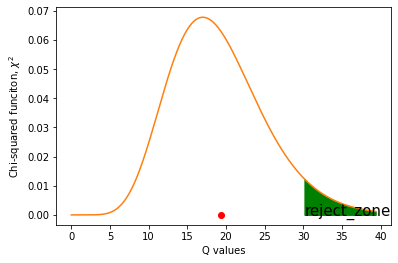

Q= 19.364613861743063


In [ ]:
# grafiquemos para entender mejor que pasa
from scipy.stats import chi2
import scipy.stats 

# encuentre el valor critico del chi-squared
critical_value = chi2.ppf(1-0.05, df=dof)

tail = Q + 20
a = np.arange(0, tail, 0.001)

def mychi2(x, M):
    return chi2.pdf(x, df=M)

plt.fill_between(a, mychi2(a,dof), 0,
                 where = (a > critical_value),
                 color='g');

yval=mychi2(Q, dof)
plt.xlabel("Q values")
plt.ylabel("Chi-squared funciton, $\chi^2$")

plt.plot(Q, 0, marker='o', markersize=6, markeredgecolor='r', markerfacecolor='r')

plt.text(critical_value, 0, 'reject_zone', fontsize=15)

plt.plot(a, mychi2(a,dof));
plt.show()
print("Q=", Q)


El ACF, ademas de darme informacion de el orden q de MA(q), tambien me indica si la serie estacionaria o no , el sentido de necesitar diferencias. El siguiente cuaderno nos indica como el ACF nos da informacion sobre este tema.

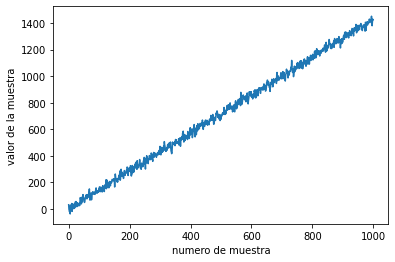

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


np.random.seed(1)
mu, sigma=0,20
N=1000

Z = np.random.normal(mu, sigma, N)

phi=0.3
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1] + t

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.plot(X)
plt.show()



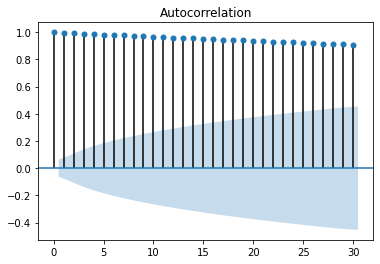

In [ ]:
plot_acf(X)
plt.show();

Como sabemos si una serie de tiempo es estacionaria o ono?

* A simple vista: Si la varianza no cambia ni la media. 
* Mire el ACF (ejemplo anterior) 
* Unit root test.

# Unit Root test
Asumamos AR(1) dice

$$ X_t = \phi X_{t-1} + Z_t $$, asumamos $c=0$.
el polinomio caracteristico de este es

$$p(B) = 1 - \phi B $$.
La raiz $r=1/\phi$. Si $\phi=1$ :( 

* Si la raiz esta dentro del circulo unitario no hay nada que hacer. No estacionario y no es facil de arreglar.
* Si la raiz es 1 no estacionario pero se puede arreglar con diferencias.
* Si la raiz es > 1 (esta por fuera del circulo unitario). Es estacionario y no hay problema.

El problema que nos atane  es $\phi=1$. The unit root .
Ese es el caso del fenomeno conocido como "random walk"

Veamos como diferencias de primer orden corrigen el problema.

Asumamos $\phi=1$. Hagamos primeras deferencias

$$ Y= \Delta X_t = X_t - X_{t-1} = Z_t $$

Es es el caso de 

### Random Walk.
* Stock market (mercado bursatil)
* Movimiento Browniano
* El caminar de un borracho.

Veamos esto en Python

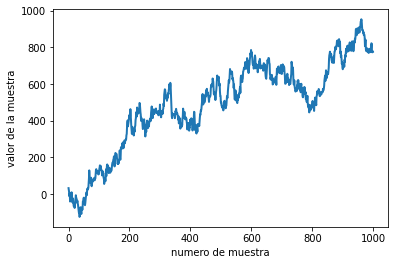

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib as mlp
mlp.rc('lines', linewidth=2) # para que las lineas salgan delgadas

np.random.seed(1)
mu, sigma=0,20
N=1000

Z = np.random.normal(mu, sigma, N)

phi=1.0
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1] 

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.plot(X)
plt.show()



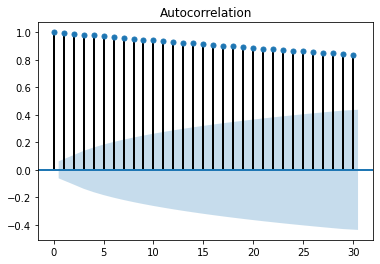

In [ ]:
# ACF
plot_acf(X)
plt.show()

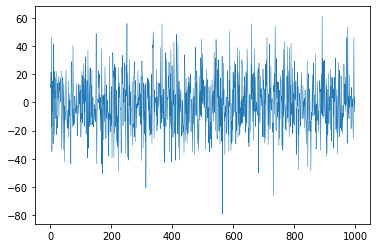

In [ ]:
# calculemos las diferencias
Y = X[:-1] - X[1:]  # X_t - X_{t-1}= Z_t
mlp.rc('lines', linewidth=0.5) # para que las lineas salgan delgadas

plt.plot(Y)


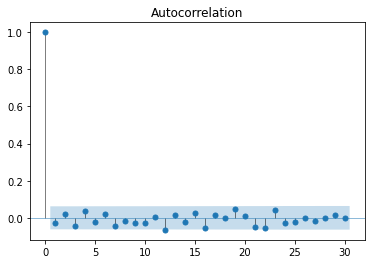

In [ ]:
# ACF
plot_acf(Y)
plt.show()

## Dickey-Fuller test

Comencemos con AR(1), es decir

$$X_t = \phi X_{t-1} + Z_t + c $$
La prueba consiste en "null hypothesis"
Si $\phi=1$ no podemos usar la distribucion normal para hipotesis por que esa es compatible con series estacioanrias. 

* H0 : $\phi=1$ y el proceso tiene una raiz unitaria
* H1 : $\phi < 1$ y el proceso es estacionario.

La forma que se ejecuta la prueba es haciendo una primera diferencia.

$$Y = \Delta X_t = X_t - X_{t-1} = (\phi -1) X_{t-1} + Z_t = \delta X_{t-1} + Z_t   $$
con $\delta= \phi-1$.

* H0 : $\delta=0$ y el proceso tiene una raiz unitaria
* H1 : $\delta < 0 $ y el proceso es estacionario.



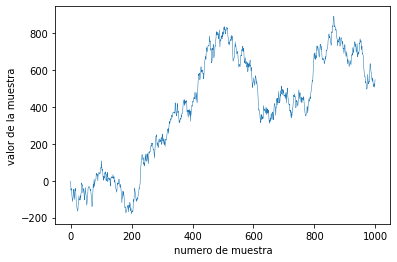

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


Z = np.random.normal(mu, sigma, N)

phi=1.0
X=np.zeros(N)
X[0]=Z[0]

for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1] 

plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.plot(X)
plt.show()





In [ ]:
result = adfuller(X)
result

(-1.4329234895917646,
 0.5663944164336063,
 0,
 999,
 {'1%': -3.4369127451400474,
  '10%': -2.568312754566378,
  '5%': -2.864437475834273},
 8679.490877868544)

In [ ]:
type(result)

tuple

In [ ]:
pvalue = result[1]
pvalue

0.5663944164336063

In [ ]:
alpha=0.05 # umbral
if pvalue < alpha:
    print("pvalue < 𝛼, p-value=%f, 𝛼=%f"%(pvalue, alpha))
    print("no paso la hipotesis nula H0 ")
    print("la hipotesis alternativa H1 indica que la serie es estacionaria")
else:
    print("pvalue < 𝛼, p-value=%f, 𝛼=%f"%(pvalue, alpha))
    print(" paso la hipotesis nula H0 ")
    print("la hipotesis alternativa H1 indica que la serie no estacionaria")

pvalue < 𝛼, p-value=0.566394, 𝛼=0.050000
 paso la hipotesis nula H0 
la hipotesis alternativa H1 indica que la serie no estacionaria


$\alpha$

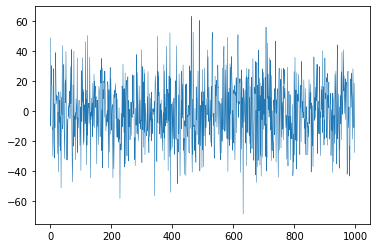

In [ ]:
# calculemos las diferencias
Y = X[:-1] - X[1:]  # X_t - X_{t-1}= Z_t
mlp.rc('lines', linewidth=0.5) # para que las lineas salgan delgadas

plt.plot(Y)



In [ ]:
result = adfuller(Y)
pvalue = result[1]
pvalue

0.0

In [ ]:
alpha=0.05 # umbral
if pvalue < alpha:
    print("pvalue < 𝛼, p-value=%f, 𝛼=%f"%(pvalue, alpha))
    print("no paso la hipotesis nula H0 ")
    print("la hipotesis alternativa H1 indica que la serie es estacionaria")
else:
    print("pvalue < 𝛼, p-value=%f, 𝛼=%f"%(pvalue, alpha))
    print(" paso la hipotesis nula H0 ")
    print("la hipotesis alternativa H1 indica que la serie no estacionaria")

pvalue < 𝛼, p-value=0.000000, 𝛼=0.050000
no paso la hipotesis nula H0 
la hipotesis alternativa H1 indica que la serie es estacionaria
